### Quantum Cryptography - Day11
# Quantum Authentication Encoding
In classical Cryptography ,authentication ensure that a message truly comes from a legitimate sender. Quantum Authentication extends this idea using **Quantum state**,where any unauthorized modification can be detected  due to the law of quantum mechanic.

In this notebook we will study **Qunatum Authentication Encoding**,focusing on how an authentication bit can be encoded using the **phase of a quantum state**.In this we will learn:
- How to Encode Authentication bit using quantum phase
- Why phase encoding is useful for authentication 
- How a receiver verifies authenticity 
- How a tampering affects the Quantum state
- Simulation of temporary attack detection
- Estimation of false acceptance probabaility

## Phase-Based  Authentication
A qubit can be represented as :
$$ |\psi\rangle=(|0\rangle + e^{i\phi}|1\rangle) / \sqrt{2} $$
here , $\phi(phase)$ can carry hidden authentication information.
- Authentication Bit '0' $\rightarrow$ $\phi =0 $
- Authentication Bit '1' $\rightarrow$ $\phi =\pi $

Any evesdropper who tries to measure or alter the risks disturbing the phase ,which allows detection.

## Import required Libraries

In [23]:
import numpy as np
import random
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_vector

## Step 1 : Encode Authetication Bit Using Phase
we want to hide the authentication information inside the **phase** of the qunatum state.Phase cannaot be directly measured without reference ,making it ideal for authentication.by performing this we get :
- Legitimate Receiver(who knows encoding rule ) can verify
- Attacker has no direct access to phase information

In [4]:
def encode_authentication_bit(auth_bit):
    if auth_bit==0:
        phase=0
    else:
        phase=np.pi
    return phase

# Example Encoding
auth_bit=random.choice([0,1])
phase=encode_authentication_bit(auth_bit)
auth_bit,phase

(0, 0)

## Step 2 : Simulate Quantum State Preparation
We prepare a simplified mathematical representation of the quantum state ,This lets us simulate behaviour without real quantum hardware .it hepl us to :
- Create a referenece  Quantum state for verification
- Allows us to track disturbance 

In [6]:
def prepare_quantum_state(phase):
    state=np.array([1,np.exp(1j *phase)]) / np.sqrt(2)
    return state
quantum_state=prepare_quantum_state(phase)
quantum_state

array([0.70710678+0.j, 0.70710678+0.j])

## Step 3 : Temporary Attack/Dectection Simulation
An attacker may try to intercept and resend the qubit.This usually introduces **random phase noise**,which help us to detect tampering. This shows:
- How quantum Authentication dtetects interference
- Demonstrate Quantum sensitivity

In [29]:
def attacker_interference(state,attack_probability=0.3):
    if random.random()< attack_probability:
        noise_phase=random.uniform(0,2*np.pi)
        disturbed_state=np.array([state[0],state[1]*np.exp(1j *noise_phase)])
        return disturbed_state,True
    return state,False

received_state,attacked=attacker_interference(quantum_state)
attacked

False

## Step 4 : Receiver Verification Process
The receiever checks whether the received  phase matches the expected autentication phase .This affect:
- Accept Valid Meassage
- Rejects tempered messages

In [30]:
def verify_state(received_state,expected_phase,tolerance=0.2):
    measured_phase=np.angle(received_state[1])
    phase_diff=abs(measured_phase - expected_phase)
    return phase_diff<tolerance

is_authenticated=verify_state(received_state,phase)
is_authenticated

np.True_

## Step 5 : False Acceptance Probability
Even when an attacker interferes ,there is a small chance the state passes verifiaction.We estimate how often this happens.This step perfom:
- Measure security strength
- Lower probability = stronger authentication


In [33]:
def estimate_false_acceptance(trials=1000):
    false_accepts=0
    for _ in range(trials):
        bit=random.choice([0,1])
        phase =encode_authentication_bit(bit)
        state=prepare_quantum_state(phase)
        received,attacked=attacker_interference(state,attack_probability=1.0)
        if verify_state(received,phase):
            false_accepts+=1
    return false_accepts/trials

false_acceptance_probability=estimate_false_acceptance()
false_acceptance_probability

0.058

we see above .the obtained false acceptance probability of 0.053 means that about 5.3% of tampered quantum state are incorrectly accepted as authetic. this value is closed to the theoritical expectation and the small difference is due to random simulation effects.overall the result shoes that phase -based quantum authentication effectively detects most attacks ,with security depending on the choose phase tolarance.

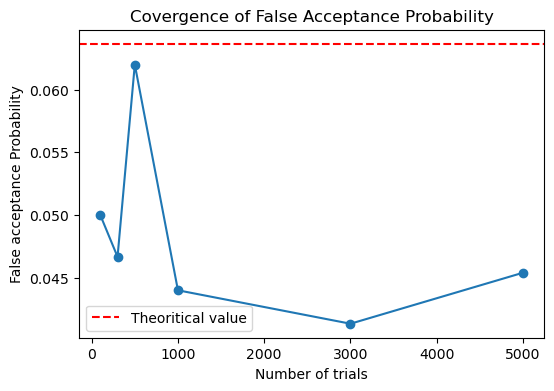

In [34]:
## Visualize result
trial_sizes=[100,300,500,1000,3000,5000]
results=[estimate_false_acceptance(trials=t) for t in trial_sizes]
plt.figure(figsize=(6,4))
plt.plot(trial_sizes,results,marker='o')
plt.axhline(0.2/np.pi,color='r',linestyle='--',label="Theoritical value")
plt.xlabel("Number of trials")
plt.ylabel("False acceptance Probability")
plt.title("Covergence of False Acceptance Probability")
plt.legend()
plt.show()

## Conclusion
- Quantum authentication uses **physical laws** insteda of computaional hardness
- Phase Encoding hides authenticationinformation effectively
- Any interference introduced detectable disturbance
- False accpatance probability quantifies system security

This approch froms the basis for **secure quantum communication protocol**used in advanced cryptographic systems.


---

**Author** : Shreya Palase

**Repository**: Quantum-Cryptography(codeQubit)

**file** : day11_Quantum_authentication_Encoding.ipynb

**Date created**: 03-February-2026

<sub>© Shreya Palase- All Rights Reserved.This notebook is part of a structured learning series designed for Github publication.</sub>